# **Exploratory Data Analysis Churn Analysis**


## **1. Import Library**

In [ ]:
# Untuk scientific computing, array dan data analysis
import pandas as pd
import numpy as np

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# Untuk uploading file
from google.colab import files

#Pandas show all column
pd.set_option('display.max_columns', 200)

# Untuk meng-ignore warning yang muncul
import warnings
warnings.filterwarnings("ignore")

## **2. Load Data**

Data yang digunakan merupakan data telco customer churn yang dapat diakses melalui link berikut:
###### https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Dataset dapat di upload pada google colab dan kemudian untuk membaca data tersebut dapat memanfaatkan library pandas yaitu `pd.read_csv` seperti berikut

Dataset didefinisikan dengan `df`


In [ ]:
uploaded= files.upload()

Saving dataset.csv to dataset (2).csv


In [ ]:
df = pd.read_csv("dataset.csv")

## **3. Data Understanding**

> ### **3.1 Dataset Info**

Setiap baris mewakili pelanggan, setiap kolom berisi atribut pelanggan yang dijelaskan pada kolom Metadata.

Kumpulan data mencakup informasi tentang:

- Pelanggan yang keluar dalam satu bulan terakhir - kolom ini disebut Churn
- Layanan yang telah didaftarkan oleh setiap pelanggan - telepon, multiple lines, internet, online security, online backup, device protection, tech support, dan streaming TV dan movies
- Informasi akun pelanggan - berapa lama mereka telah menjadi pelanggan, kontrak, metode pembayaran, paperless billing, tagihan bulanan, dan total tagihan
- Info demografis tentang pelanggan - jenis kelamin, rentang usia, dan apakah mereka memiliki pasangan dan tanggungan

In [ ]:
# show 5 top rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Keterangan Kolom :**

1. customerID : A unique ID that identifies each customer.
2. gender: The customer’s gender: Male, Female

3. SeniorCitizen : Indicates if the customer is 65 or older: Yes, No

4. Partner : Indicates if the customer is married: Yes, No

5. Dependents : Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

6. tenure : Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above
       
7. PhoneService :Indicates if the customer subscribes to home phone service with the company: Yes, No

8. MultipleLines : Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

9. InternetService : Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

10. OnlineSecurity : Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

11. OnlineBackup : Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

12. DeviceProtection : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

13. TechSupport : Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
       
14. StreamingTV : Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

15. StreamingMovies : Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

16. Contract : Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

17. PaperlessBilling : Indicates if the customer has chosen paperless billing: Yes, No

18. PaymentMethod : Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

19. MonthlyCharges : Indicates the customer’s current total monthly charge for all their services from the company.

20. TotalCharges : Indicates the customer’s total charges, calculated to the end of the quarter specified above.

21. Churn : Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Sumber: [*Telco Customers Churn*](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

In [ ]:
# Mengetahui dimensi dataset (jumlah rows dan column)
df.shape

(7043, 21)

Dataset terdiri atas 7043 rows dengan 21 column

In [ ]:
#show columns (Mengetahui variabel/ column yang terdapat dalam dataset)
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#show data info and check for null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Yang perlu diperhatikan:
- Apakah ada data dengan tipe yang kurang sesuai? Misal, Name dengan tipe int64
- Apakah ada data yang hilang? Cari kolom dengan count < jumlah row



Berdasarkan info data, diketahui bahwa:
1. Untuk tipe data pada variabel `Senior Citizen` berupa int64. Hal ini karena dilakukan data encoding pada variabel tersebut (code 0 dan 1) sehingga terdeteksi menjadi tipe integer. Tipe tersebut kurang sesuai karena variabel tersebut merupakan variabel data kategorik sehingga harusnya berupa object.

2. Pada variabel `TotalCharges` juga memiliki tipe data yang kurang sesuai. pada info diatas, diketahui bahwa varaibel tersebut memiliki tipe object. Namun jika dilihat, data berupa data numeric bukan kategorik. Sehingga harusnya berupa float.

3. Variabel `CustomerID` merupakan data yang digunakan sebagai Key, sehingga tiap data/customer memiliki `CustomerID` yang berbeda satu sama lain. Dalam analisis ini, variabel tersebut tidak digunakan sehingga dapat kita drop.

**Summary:**

- Mengganti tipe data `SeniorCitizen` menjadi tipe data object
- mengganti tipe data `TotalCharges `menjadi float
- Drop `CustomerID`
- Missing value checking & handling


> ### **3.2 Data Pre-Processing**


- Mengganti tipe data `SeniorCitizen` menjadi *object* (categorical data)

Untuk mengganti tipe data menjadi *object*, dapat menggunakan atribut `.astype`

In [ ]:
#convert seniorcitizen into category
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dapat dilihat bahwa tipe data untuk variabel `SeniorCitizen` sudah berubah menjadi *object*  

- Mengganti tipe data `TotalCharges` menjadi float (Numerical data)

Untuk mengganti tipe data menjadi float, diguankan library `pandas` as `pd` dengan atribut `to_numeric`

In [ ]:
# convert total charges to float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
# Atau dapat pula menggunakan code berikut:
# df['TotalCharges'] = df['TotalCharges'].apply(lambda x: np.nan if x == ' ' else float(x))
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Dapat dilihat bahwa untuk tipe data pada variabel `TotalCharges` sudah berubah menjadi float

- Drop variabel/column `CustomerID`

Untuk drop data, digunakan atribut `.drop`

In [ ]:
#drop irrelevant columns
df=df.drop(columns=['customerID'])
df.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Dapat dilihat bahwa variabel `customerID` sudah di drop dari dataset.

Setelah memperbaiki tipe data dan men-drop kolom atau variabel yang tidak digunakan, selanjutnya melakukan checking kembali untuk mengetahui apakah tipe data sudah sesuai dan apakah terdapat missing value atau tidak.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   object 
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# Missing value checking
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Berdasarkan info diatas, diketahui bahwa pada variabel/ kolom `TotalCharges`, terdapat 11 missing value, sehingga harus dilakukan missing value handling.

Missing value yang terdapat dalam variabel `TotalCharges` berjumlah 11 data dari 7043 data yang ada atau sebesar 0.16% dari jumlah total data. Karena jumlah missing values terbilang kecil maka handling yang dapat dilakukan yaitu dengan menghilangkan/drop data yang missing/hilang tersebut.

In [ ]:
#missing value handling
df[df['TotalCharges'].isna()]
#drop rows with missing value
df=df.dropna()
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Setelah dilakukan missing value handling, sudah tidak terdapat missing value di semua variabel sehingga dapat dilanjutkan ke tahap berikutnya

> ### **3.3 Memisahkan data Categorical dan Numerical**

Pemisahan antara data Categorical dan Numerical dilakukan berdasarkan tipe data. Variabel atau data dengan tipe `object` akan dikategorikan kedalam data Categorical, sedangkan untuk tipe data lainnya akan dikategorikan ke dalam data Numerical.

Karena Churn merupakan variabel target atau variabel yang akan dianalisis, maka tidak dimasukkan ke dalam data kategorik.

In [ ]:
# Categorical Data
# Variabel Churn tidak dimasukkan ke cats kareana menjadi variabel target
cats=[i for i in df.columns if df[i].dtypes == 'object' and i != 'Churn']
# Numerical Data
nums=[i for i in df.columns if df[i].dtypes != 'object']

In [ ]:
#print variabel/column dari categorical variabel
print(cats)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [ ]:
#print variabel/column dari numerical variabel
print(nums)

['tenure', 'MonthlyCharges', 'TotalCharges']


Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

>> #### **Value Counts Data Categorical**

Digunakan untuk menghitung jumlah data tiap value pada masing-masing variabel kategorik.

In [ ]:
# Value count
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom gender:
Male      3549
Female    3483
Name: gender, dtype: int64

Value count kolom SeniorCitizen:
0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Value count kolom Partner:
No     3639
Yes    3393
Name: Partner, dtype: int64

Value count kolom Dependents:
No     4933
Yes    2099
Name: Dependents, dtype: int64

Value count kolom PhoneService:
Yes    6352
No      680
Name: PhoneService, dtype: int64

Value count kolom MultipleLines:
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Value count kolom InternetService:
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Value count kolom OnlineSecurity:
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

Value count kolom OnlineBackup:
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: 

Selain untuk mengetahui jumlah unique value pada setiap variabel/kolom/feature, Value counts yang dilakukan diatas juga dimaksudkan untuk mengecek apakah terdapat value yang tidak sesuai. Berdasarkan hasil diketahui bahwa semua value pada masing-masing variabel sudah sesuai.

## **4. Statistical Summary**

Selanjutnya memunculkan ringkasan statistik dataframe

> ### **4.1 Pendekatan Numerik**

In [ ]:
# Describe Numerical Data
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


Yang perlu diperhatikan:
- Apakah nilai yang tertera pada setiap kolom masuk akal?
- Apakah nilai maksimal/minimal masih berada di batas wajar? Min/max yang terlalu jauh dari mean/median bisa jadi indikasi kesalahan input data
- Apakah ada kolom dengan perbedaan yang signifikan antara mean dan median? Perbedaan antara mean/median mengindikasikan outlier atau skewed distribution

**Summary:**

Hasil diatas memberikan informasi/ deskripsi tentang numerical data yang terdapat dalam dataset diantaranya yaitu jumlah data, nilai mean, standar deviasi, nilai minimum, maksimum, dan nilai quartile. Berdasarkan informasi diatas diketahui bahwa:
- Semua variabel numerik memiliki data yang lengkap yaitu 7032 (dimana sebelumnya 11 data yang terdapat missing value di drop).
- Pada variabel tenure, menunjukkan jumlah total bulan pelanggan telah bergabung dengan perusahaan pada akhir kuartal yang ditentukan di atas. Para customer rata-rata telah bergabung di perusahaan selama 32.42 bulan dengan median 29 bulan. Karena perbedaan antara mean dan median tidak terlalu jauh, kemungkinan distribusinya tidak terlalu miring. Standar deviasi sebesar 24 bulan, yang artinya persebaran data customer bergabung dengan perusahaan bisa +- 24 bulan dari rata rata. Customer yang terdata minimal telah bergabung selama 1 bulan dan paling lama 72 bulan. Nilai min max maupun nilai lain seperti mean dan quartile wajar dan masuk akal sehingga dapat diindikasi tidak terjadi kesalahan input pada variabel tenure.
- Pada variabel MonthlyCharges, menunjukkan total tagihan bulanan pelanggan saat ini untuk semua layanan dari perusahaan. Para customer rata-rata mendapat tagihan sebesar 64.798208 dengan median sebesar 70.350. Perbedaan nilai tersebut sedikit jauh sehingga diduga distribusinya sedikit miring (skewed) ke kiri (rata-rata < median). Customer yang terdata minimal mendapat tagihan sebesar 18.25 dan paling tinggi hingga 118.75. Besar tagihan ini tergolong wajar dan masuk akal sehingga dapat diindikasi tidak terjadi kesalahan input pada variabel MonthlyCharges.
- Pada variabel TotalCharges, menunjukkan total tagihan pelanggan, dihitung hingga akhir kuartal yang ditentukan di atas. Rata-rata tagihan total yang didapat customer sebesar 2283.300441 dengan median 1397.475. Perbedaan nilai ini terpaut cukup jauh sehingga diduga distribusi datanya cenderung miring(skewed) ke kanan bahkan kemungkinan terdapat outlier. Customer yang terdata minimal mendapat total tagihan sebesar 18.80 dan paling tinggi hingga 8684.80. Angka tersebut masih tergolong wajar dan masuk akal.

> ### **4.2 Pendekatan kategorik**

In [ ]:
# Melihat unique value dengan frekuensi terbanyak
df[cats].describe().T

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


Yang perlu diperhatikan:
- Apakah jumlah unique values masuk akal?
- Apakah frekuensi dari nilai yang paling umum terlalu timpang? Apabila distribusi nilai terlalu timpang, feature tidak akan terlalu berguna dalam klasifikasi

Summary:

Hasil diatas digunakan untuk mengetahui jumlah unique value dan unique value dengan frekuensi tertinggi/terbanyak pada masing-masing variabel. Diketahui bahwa:
- Terdapat 6 variabel/feature dengan 2 unique value, 9 variabel/feature dengan 3 unique value, dan 1 variabel/feature dengan 4 unique value. Jumlah unique value pada tiap variabel tersebut masuk akal dan sesuai.
- Berdasarkan frekuensi data pada top unique value, terdapat variabel yang memiliki ketimpangan sangat tinggi (sangat timpang) antar unique valuenya, yaitu variabel PhoneService dan SeniorCitizen. Variabel PhoneService memiliki frekuensi sebesar 6352 customers untuk value 'yes' dan 680 customers untuk 'No'. sedangkan pada variabel SeniorCitizen terdapat 5890 customers merupakan '0' dan 1142 customers '1'. Nilai tersebut sangat timpang atau berbeda jauh. Hal ini akan berpengaruh pada machine learning, dimana menyebabkan tingkat keakuratan rendah, karena tidak memiliki pengaruh yang signifikan. Data yang bagus yaitu data yang terdistribusi dengan baik, sebagai contoh yaitu variabel gender dan partner.

## **5. Univariate Analysis**
Setelah melakukan analisis sederhana tentang statistik deskriptif, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

> ### **5.1 Boxplot**

Untuk boxplot dan histogran, hanya digunaakan data numeric yaitu tenure, MonthlyCharges dan TotalCharges.

In [ ]:
df[nums].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


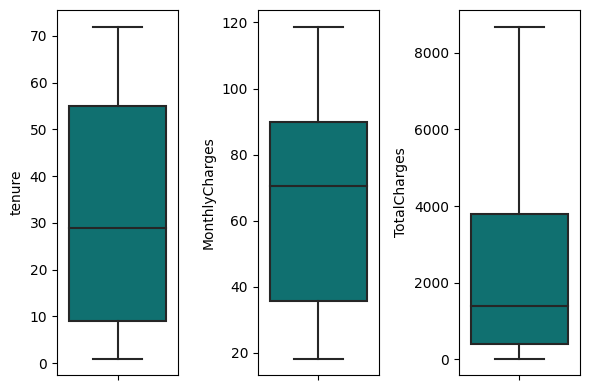

In [ ]:
plt.figure(figsize=(6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[nums[i]], color='teal', orient='v')
    plt.tight_layout()

Yang perlu diperhatikan:
- Berapa banyak dan berapa jauh outlier di setiap kolom? Definisi umum outlier: berjarak 1.5x IQR dari Q1/Q3
- Bagaimana Distribusi Datanya ?

**Summary**
- Untuk variabel tenure, semua customer berada pada batas normal/wajar dimana tidak terdapat customer yang bergabung di perusahaan dalam jangka waktu yang terlalu lama atau sebentar. Distribusi terbanyak berada pada rentang 10 - 55 bulan dan rata-rata sekitar +- 30 bulanan.
- Untuk variabel MonthlyCharges, semua customer juga berada pada batas normal/wajar dimana tidak terdapat customer yang menerima tagihan terlalu rendah ataupun terlalu tinggi.
- Untuk variabel TotalCharges, semua customer berada pada batas normal/wajar dimana tidak terdapat customer yang menerima tagihan terlalu rendah ataupun terlalu tinggi. Namun, dilihat dari boxplot, diketahui bahwa distribusi data cenderung miring ke kanan, sebab whisker atas lebih panjang.

> ### **5.2 Histplot**

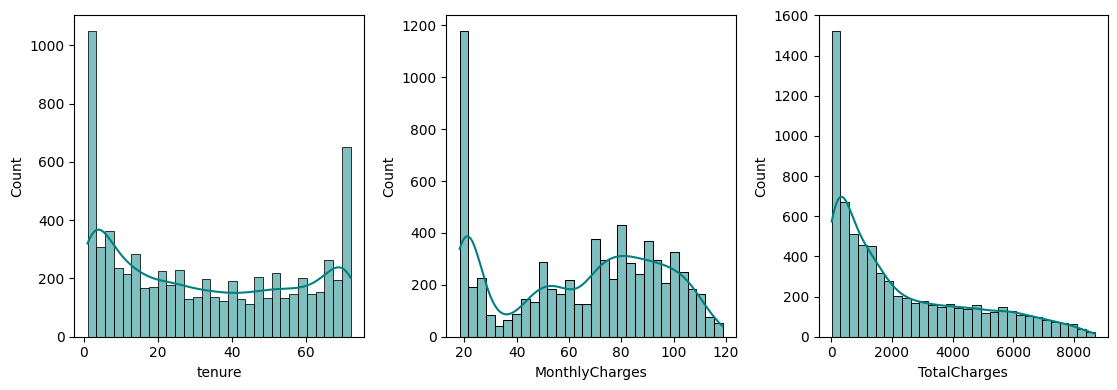

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.histplot(df[nums[i]], color='teal', kde=True, bins = 30)
    plt.tight_layout()

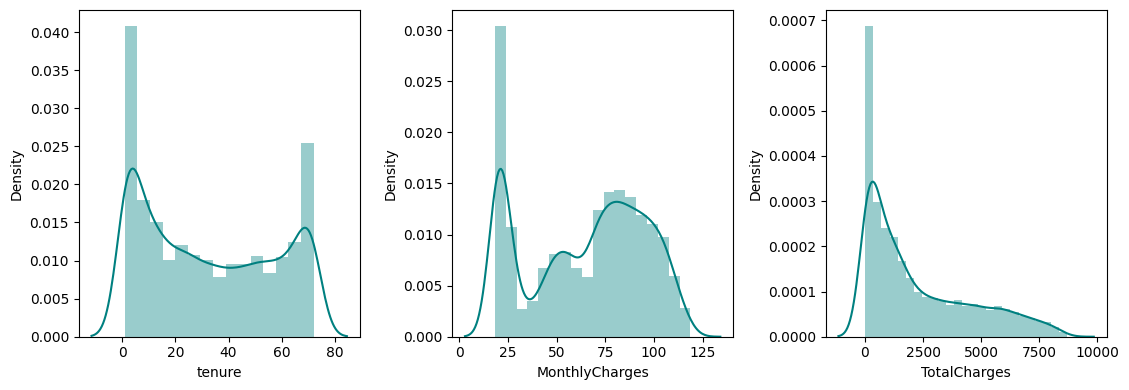

In [ ]:
plt.figure(figsize=(15, 4))
for i in range(0, len(nums)):
    plt.subplot(1, 4, i+1)
    sns.distplot(df[nums[i]], color='teal')
    plt.tight_layout()

Yang perlu diperhatikan:
- Bagaimana bentuk distribusi setiap kolom? Apakah normal? Positive skewed? Negative skewed? Bimodal?
- Apakah ada nilai-nilai tertentu yang umum? Lonjakan pada distribution plot mungkin menmiliki makna tertentu

**Summary:**

- Distribusi data tenure cenderung mengalami bimodal distribution, hal ini dapat dilihat pada histogram ataupun displot bahwa terdapat 2 'puncak' yang merepresentasikan terdapat 2 modus.
- Distribusi data MonthlyCharges juga mengalami bimodal sebab dalam histogram ataupun displot terdapat lebih dari 1 puncak.
- Distribusi data TotalCharges cenderung mengalami kemiringan ke kanan

> ### **5.3 Countplot (categorical)**

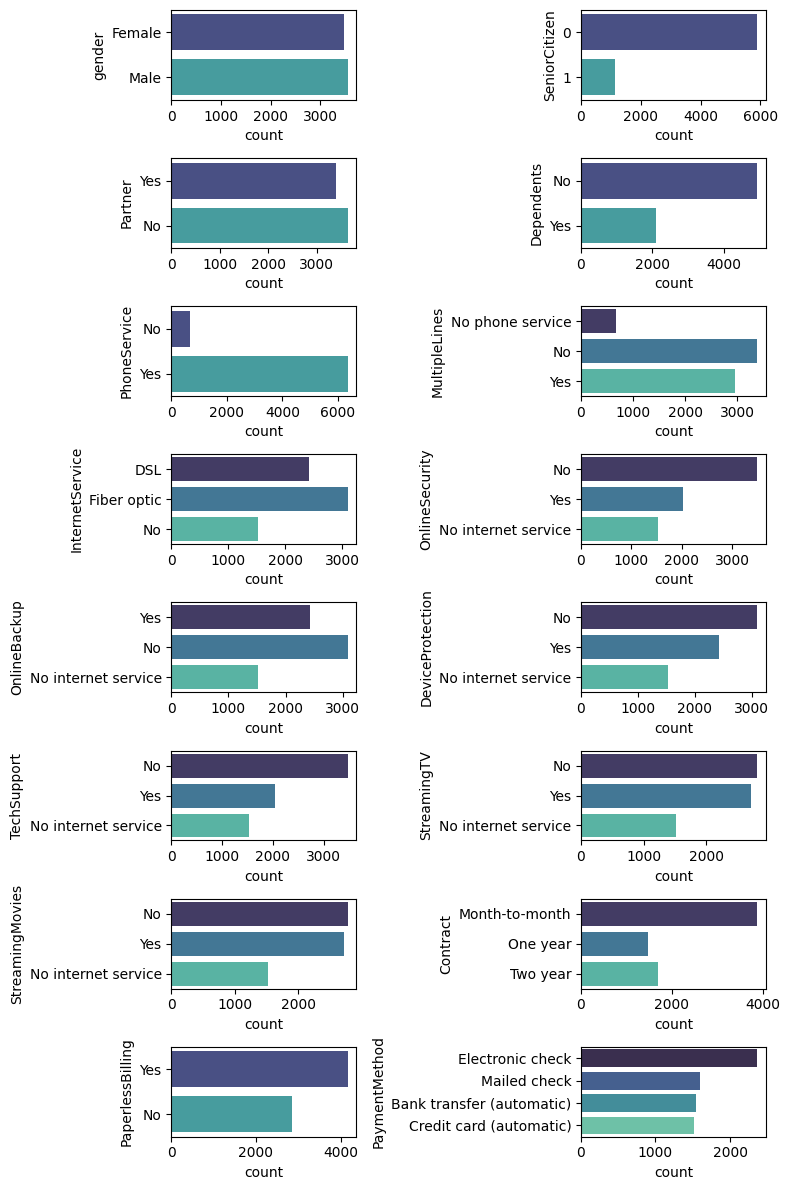

In [ ]:
plt.figure(figsize=(8, 12))
for i in range(0, len(cats)):
    plt.subplot(8, 2, i+1)
    sns.countplot(y = df[cats[i]], orient='v', palette='mako')
    plt.tight_layout()

<Axes: xlabel='Churn', ylabel='count'>

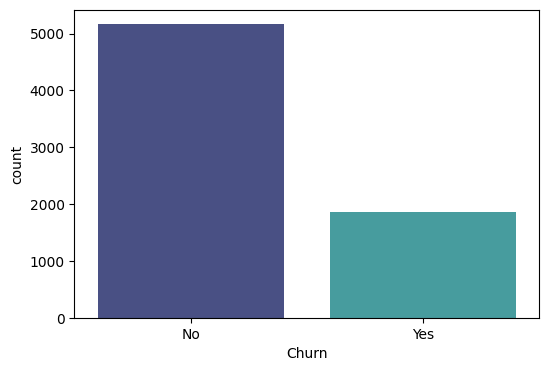

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df,x="Churn", palette='mako')

Yang perlu diperhatikan:
- Ketimpangan antar kategori, terutama pada target Sebaran kategori yang timpang pada feature merupakan indikasi ketidakgunaan feature. Pada target, sebaran yang timpang dapat membuat proses learning gagal.

**Summary :**

- Berdasarkan countplot dari semua variabel/feature, diketahui bahwa terdapat beberapa variabel yang mengalami ketimpangan antar kategori/unique value. Contohnya yaitu variabel PhoneService dan SeniorCitizen. Kedua variabel tersebut memiliki perbedaan yang signifikan antara value satu dengan value yang lainnya, misalnya pada variabel PhoneService, value 'No' memiliki frekuensi yang jauh lebih sedikit dibanding value 'Yes'. Ketimpangan ini akan berpengaruh terhadap machine learning dimana hal tersebut menyebabkan tingkat akurasi rendah dan berakibat pada proses learning yang gagal.

- Dari countplot diatas juga dapat diambil insight untuk kepentingan business. Contohnya pada countplot PaymentMethod, diketahui metode pembayaran yang paling banyak dilakukan customers yaitu melalui Electronic Check. Perusahaan dapat meningkatkan pelayanan pada motode pembayaran melalui electronic check.

## **6. Bivariate Analysis**

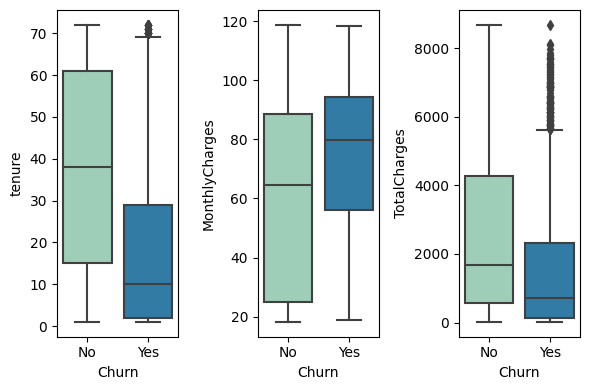

In [ ]:
plt.figure(figsize = (6,4))
for i in range(0, len(nums)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y = df[nums[i]], x = df['Churn'], orient = 'v', showfliers = True, palette='YlGnBu')
    plt.tight_layout()

- Customers yang Churn, ada kecenderungan tenure-nya (lama customers bergabung dalam perusahaan) lebih pendek dibanding customers yang tidak Churn. Dan customers yang sudah lebih dari 40 bulan, mereka cenderung sudah loyal
- Customers yang Churn, cenderung memiliki biaya bulanan yang sedikit lebih tinggi dibanding customers yang tidak Churn
- Customers yang tidak Churn, memiliki persebaran data total charges yang lebih bervariasi.

*Data dikatakan bagus untuk machine learning jika kedua kotak (antar unique value) memiliki perbedaan/terpisah. Karena jika semakin sama boxplot tersebut maka semakin tidak ada perbedaan antar kedua value yang menyebabkan machine learning tidak dapat menemukan polanya.*

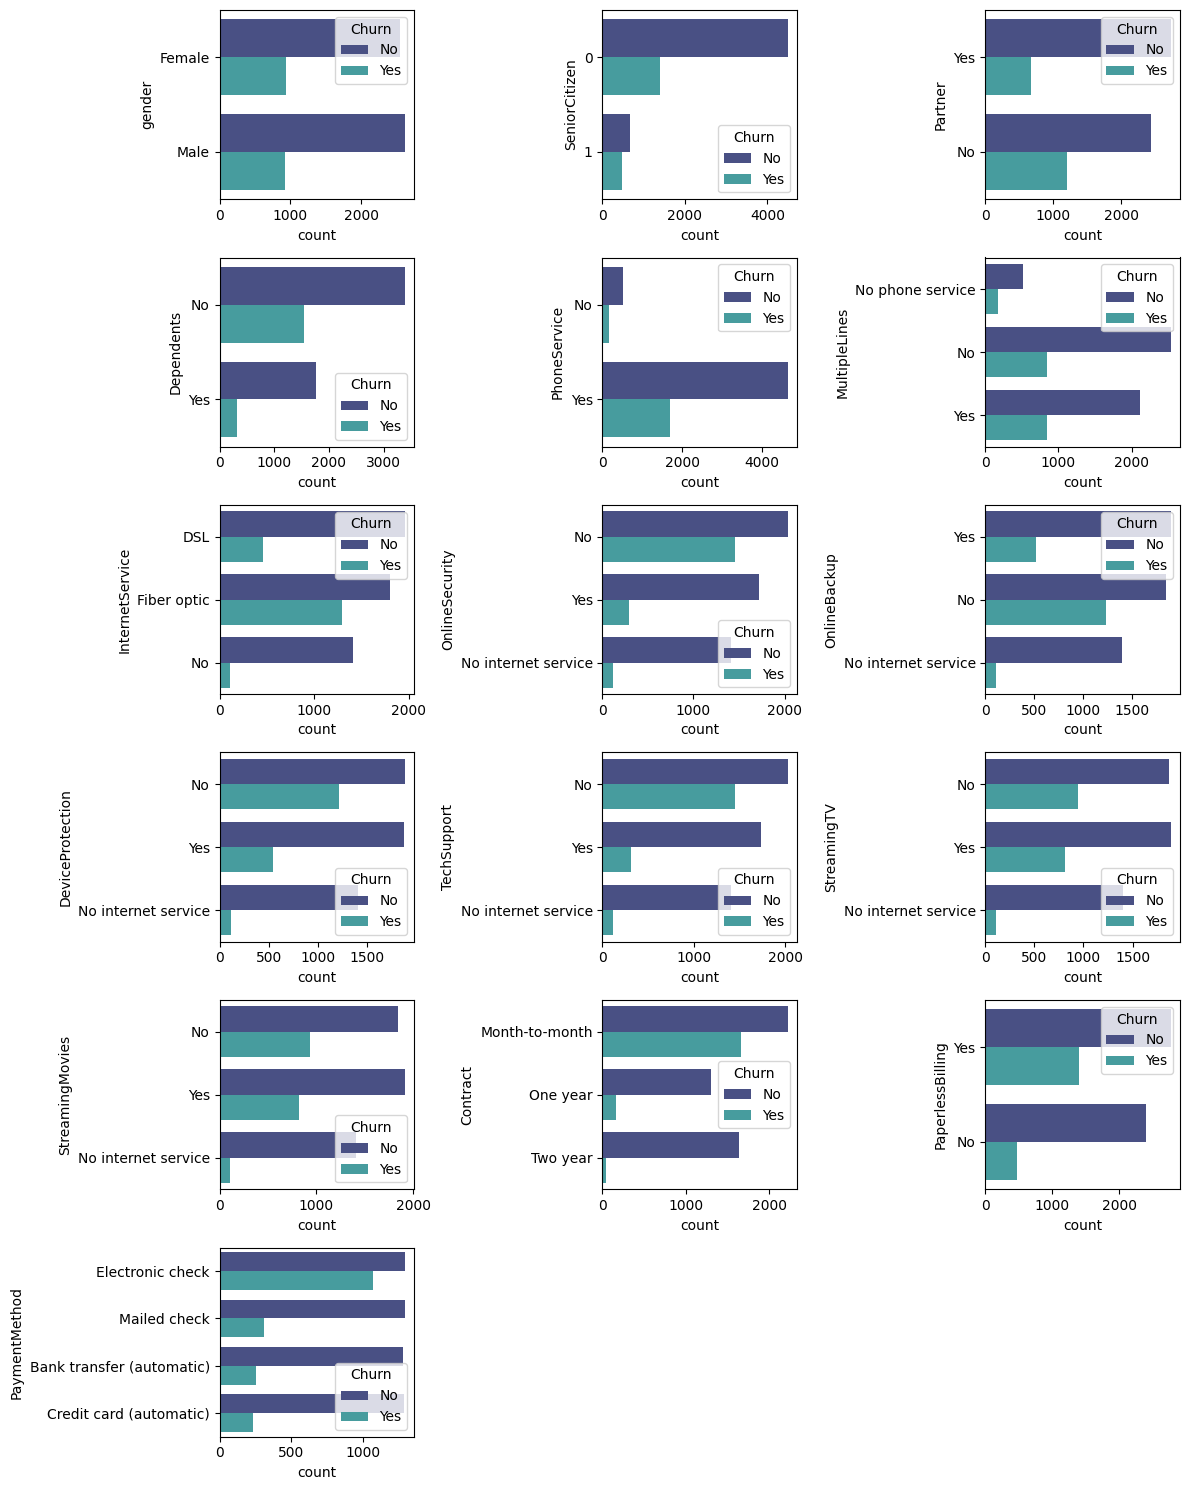

In [ ]:
plt.figure(figsize = (12,15))
for i in range(0, len(cats)):
    plt.subplot(6, 3, i+1)
    sns.countplot(y = df[cats[i]], hue = df['Churn'], orient = 'v', palette='mako')
    plt.tight_layout()

Countplot diatas, kita dapat mengetahui perbedaan persentase data tiap unique value pada tiap variabel berdasarkan Churn.

Contoh insight yang dapat diambil misalnya dari variabel SeniorCitizen, diketahui bahwa dari customers yang sudah senior, sekitar 80% mereka Churn, sedangkan untuk customers yang tidak senior, hanya sekitar 25% dari meraka yang Churn. Artinya, customers senior cenderung mengalami Churn dibandingkan customers yang tidak senior.

## **7. Multivariate Analysis**

Setelah menilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

> ### **7.1 Correlation heatmap**

- **Variabel Numeric**

<Axes: >

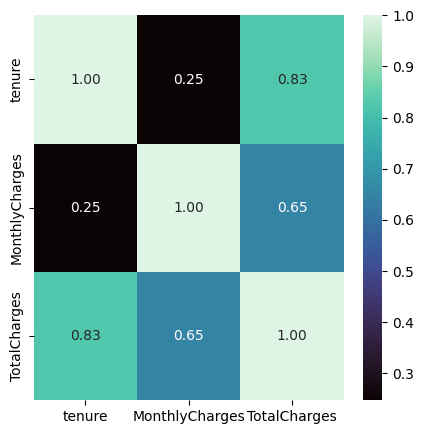

In [ ]:
# Correlation Heatmap untuk variabel numerik
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='mako')

Yang perlu diperhatikan:
- Apakah feature memiliki korelasi dengan target? Bila tidak, maka model linear tidak dapat digunakan
- Apakah ada 2 feature yang berkorelasi kuat (>0.9)? Bila ya, ada kemungkinan besar kedua feature tersebut redundan

Summary:
- Misalkan tenure menjadi variabel target, maka dapat dilihat bahwa nilai korelasi antar tenure dengan MonthlyCharges sebesar 0.25 ini artinya kedua feature berkorelasi rendah dan positif. Sedangkan korelasi antara tenure dengan TotalCharges bernilai 0.83 hal ini menandakan kedua feature berkorelasi kuat secara positif. (*Sumber: [Analisis Korelasi](https://ilmustatistika.com/analisis-korelasi/)*)
- Semakin tinggi tenure atau semakin lama customers bergabung di perusahaan, maka total charges juga semakin tinggi pula.
- Berdasarkan heatmap, tidak terdapat 2 feature yang berkorelasi sangat kuat (>0.9). Sehingga kemungkinan besar tidak terdapat redundan antar feature.

- **Variabel Categoric**

Sebelum membuat heatmap untuk variabel kategorik, perlu dilakukan encoding data. Encoding dapat dilakukan dengan one-hot encoding sebagai berikut

In [ ]:
#get dummies to transform data
df2=pd.get_dummies(df,drop_first=True)

In [ ]:
df2.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


<Axes: >

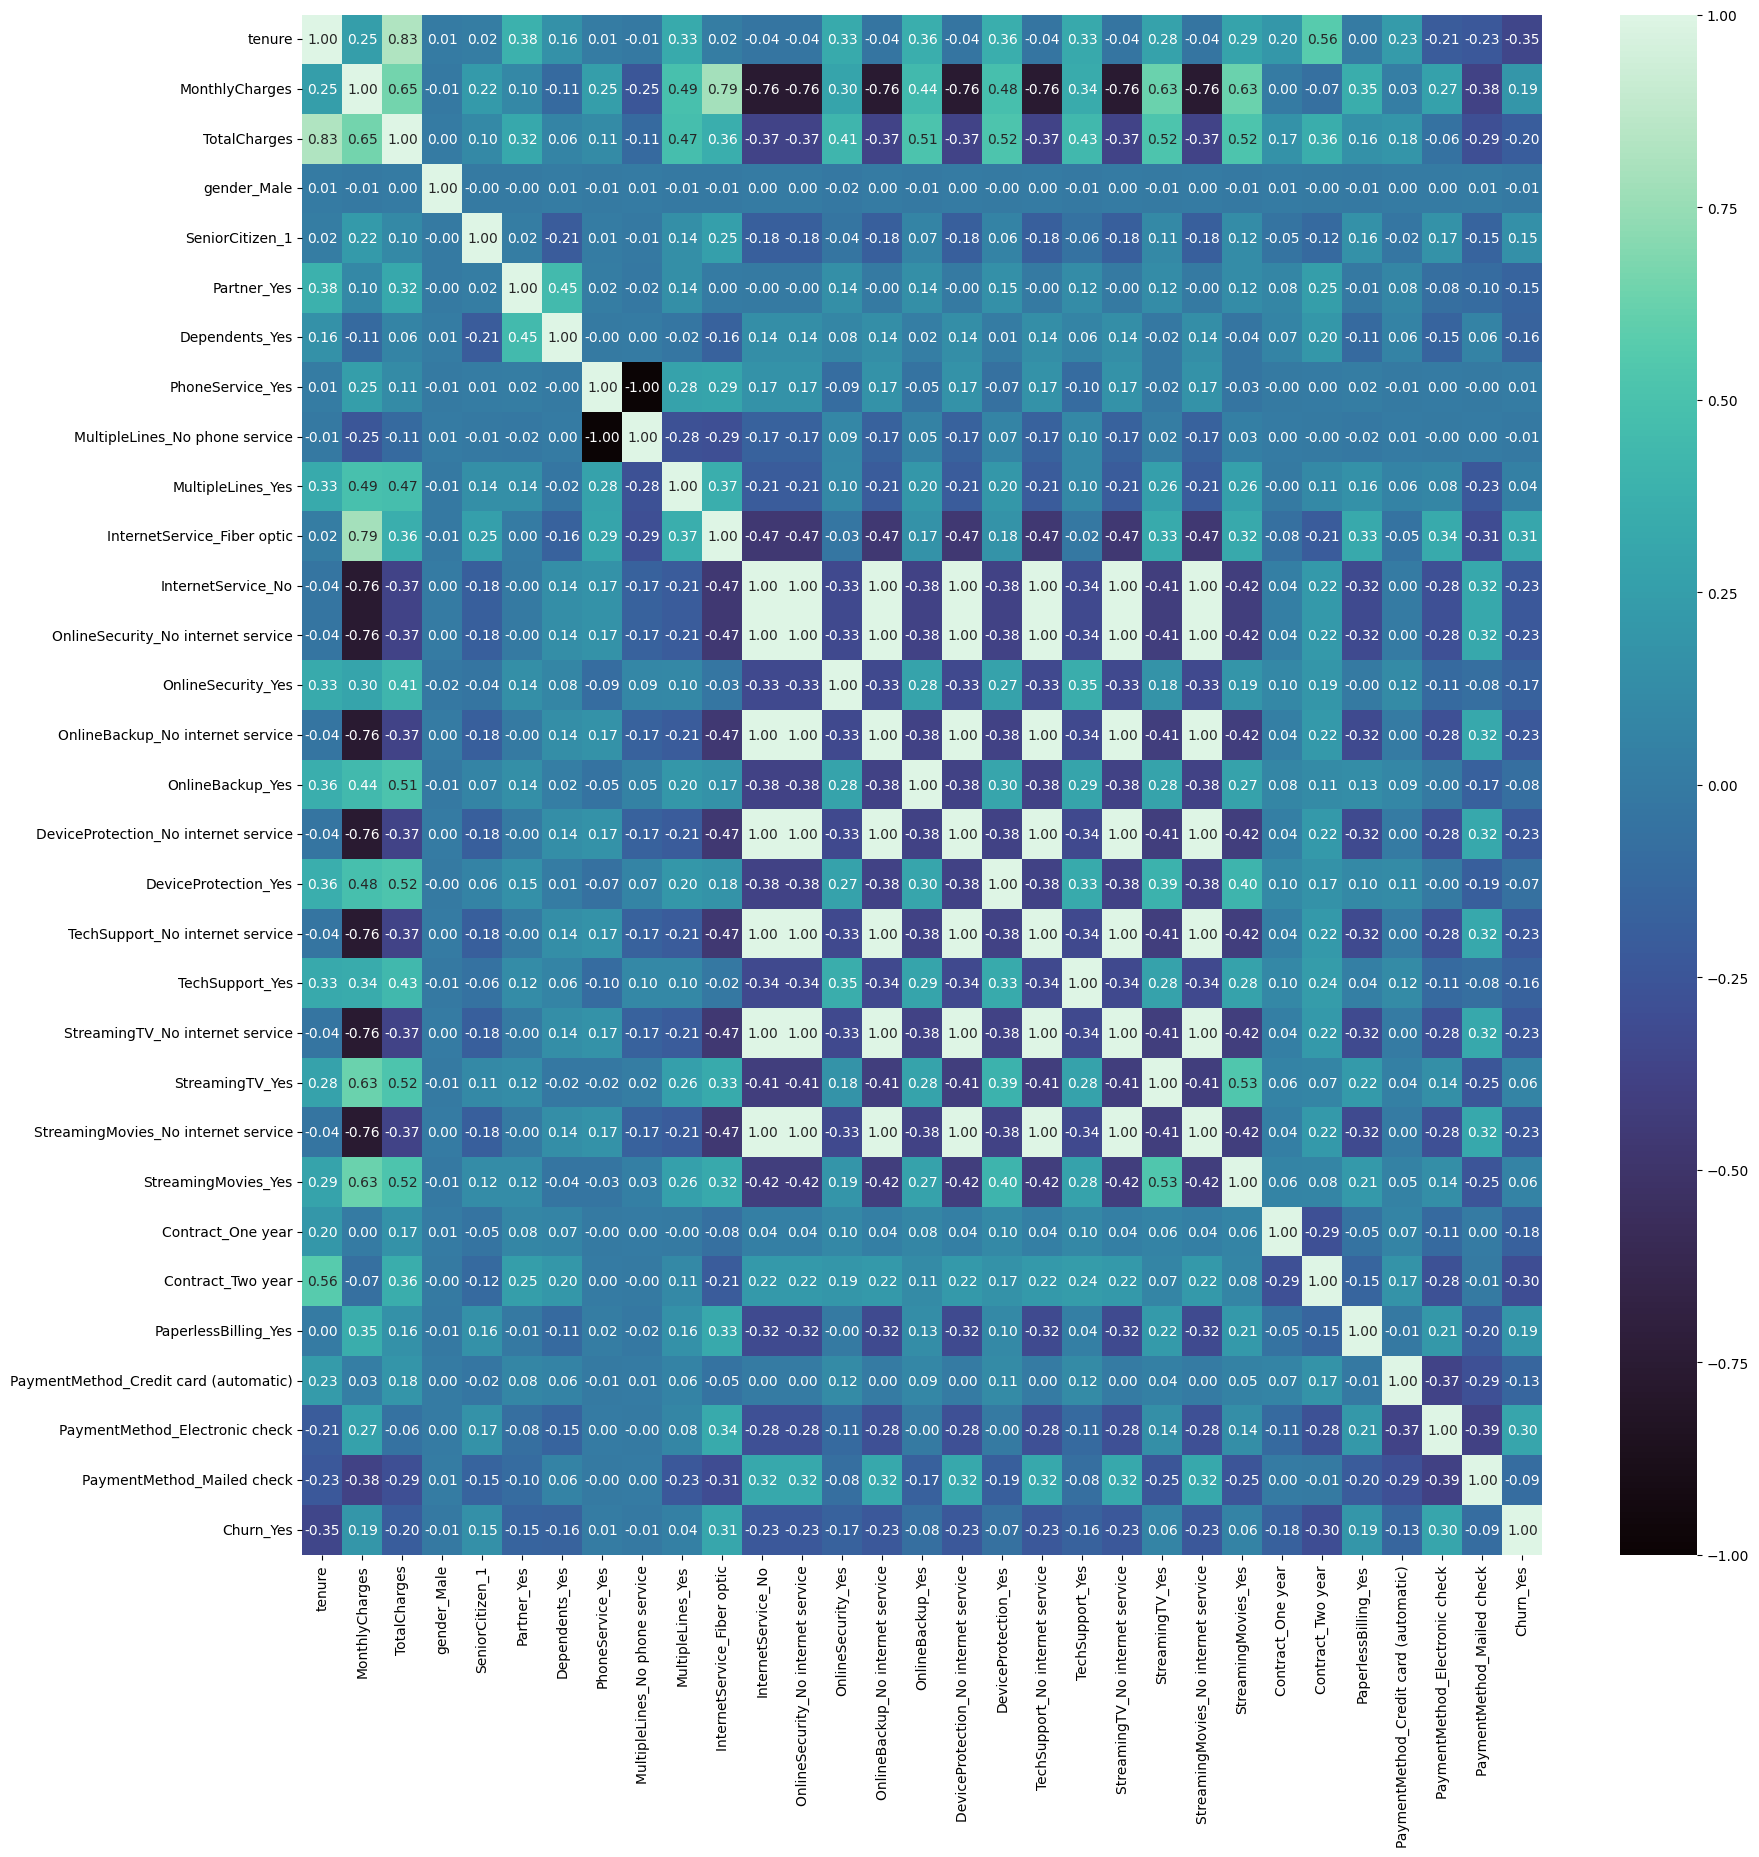

In [ ]:
# Correlation Heatmap untuk variabel kategorik
plt.figure(figsize = (20, 20))
sns.heatmap(df2.corr(), annot = True, fmt=".2f", cmap='mako')

Untuk mengetahhui nilai korelasi antara variabel kategorik dengan kemungkinan customers Churn, dapat dilakukan dengan code berikut.

In [ ]:
#correlation

# 0 no correlation
# 1 positive correlation
# -1 negative correlation

df3=df2.corr()['Churn_Yes'].sort_values().reset_index()

df3

,index,Churn_Yes
0,tenure,-0.354049
1,Contract_Two year,-0.301552
2,OnlineBackup_No internet service,-0.227578
3,OnlineSecurity_No internet service,-0.227578
4,InternetService_No,-0.227578
5,TechSupport_No internet service,-0.227578
6,StreamingMovies_No internet service,-0.227578
7,StreamingTV_No internet service,-0.227578
8,DeviceProtection_No internet service,-0.227578
9,TotalCharges,-0.199484


Nilai korelasi yang negatif (-) artinya memiliki hubungan yang negatif atau berbanding terbalik, sedangkan nilai korelasi yang positif (+) artinya memiliki hubungan yang positif atau searah.

In [ ]:
#drop Churn_Yes
df3=df3[~df3['index'].str.contains('Churn_Yes')]
df3

,index,Churn_Yes
0,tenure,-0.354049
1,Contract_Two year,-0.301552
2,OnlineBackup_No internet service,-0.227578
3,OnlineSecurity_No internet service,-0.227578
4,InternetService_No,-0.227578
5,TechSupport_No internet service,-0.227578
6,StreamingMovies_No internet service,-0.227578
7,StreamingTV_No internet service,-0.227578
8,DeviceProtection_No internet service,-0.227578
9,TotalCharges,-0.199484


Jika nilai korelasi tersebut dibuat dalam visualisasi, maka akan terlihat seperti berikut

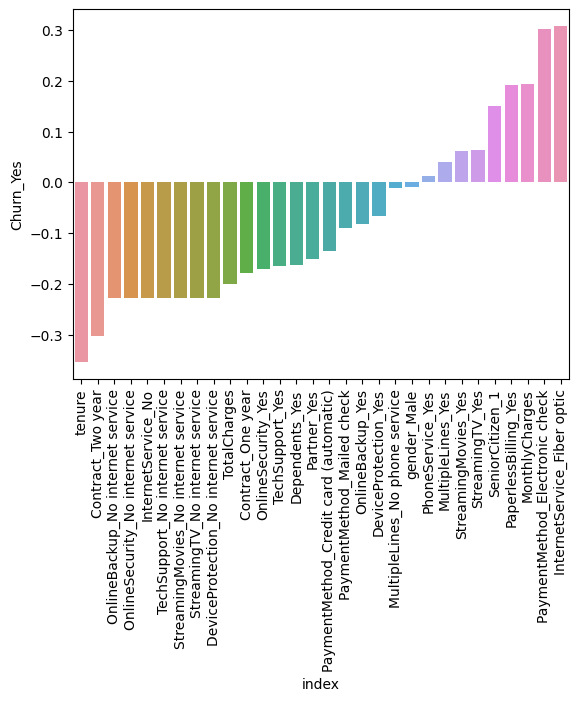

In [ ]:
chart = sns.barplot(data=df3,x="index",y="Churn_Yes")

for item in chart.get_xticklabels():
  item.set_rotation(90)

> ### **7.2 Category Plot**

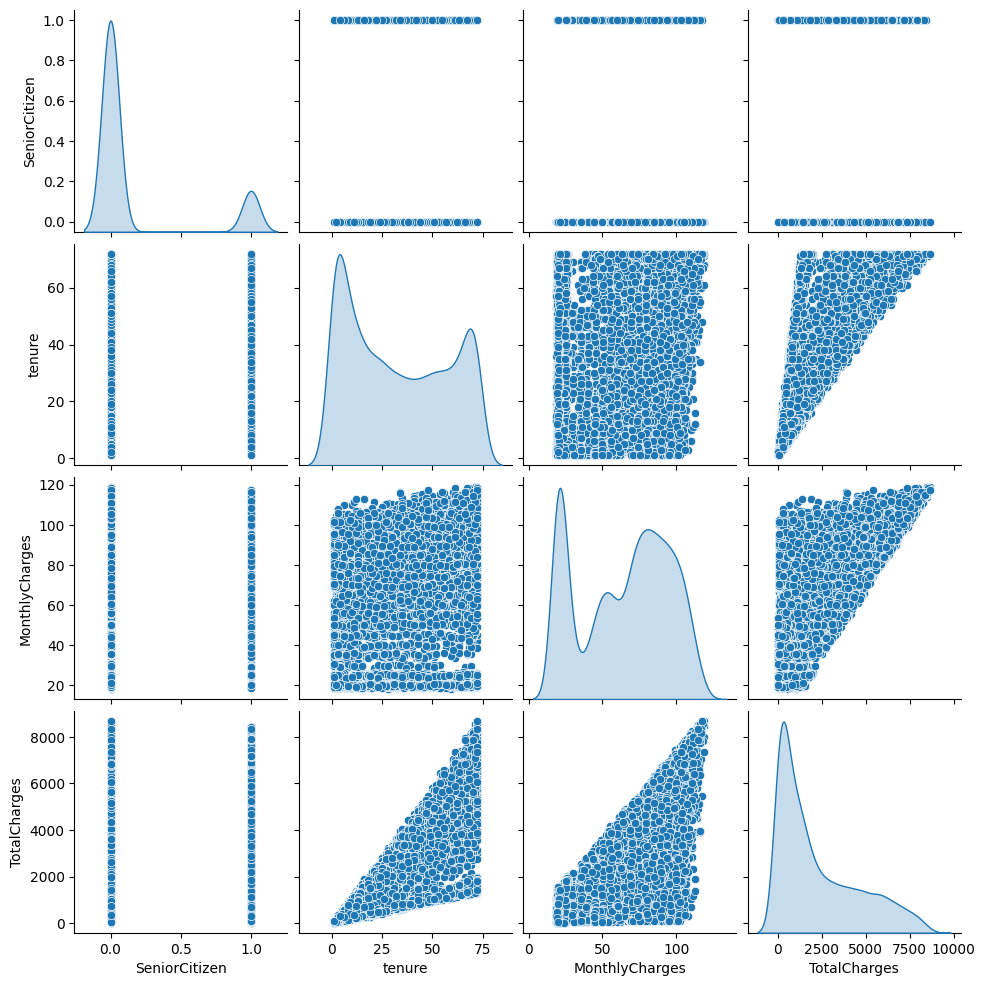

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

Apakah ada scatter plot yang menunjukkan cluster yang
cukup jelas? Pola pada scatter plot bisa menjadi petunjuk untuk membuat feature baru

**Summary:**
Berdasarkan scatterplot tersebut diketahui:
- antara variabel tenure dan monthly charges, memiliki persebaran data yang cenderung merata.
- antara variabel tenure dengan totalcharges memiliki persebaran data yang berpola. Dimana semakin lama tenure, maka customer cenderung memiliki totalcharges yang semakin tinggi pula. Selain itu semakin lama tenure, maka semakin bervariasi juga totalcharges customers.
- antara variabel monthlycharges dengan totalcharges memiliki persebaran data yang berpola juga. Dimana semakin tinggi monthly charges, maka customer cenderung memiliki totalcharges yang semakin tinggi pula. Selain itu semakin tinggi monthlycharges, maka semakin bervariasi juga persebaran data totalcharges customers.


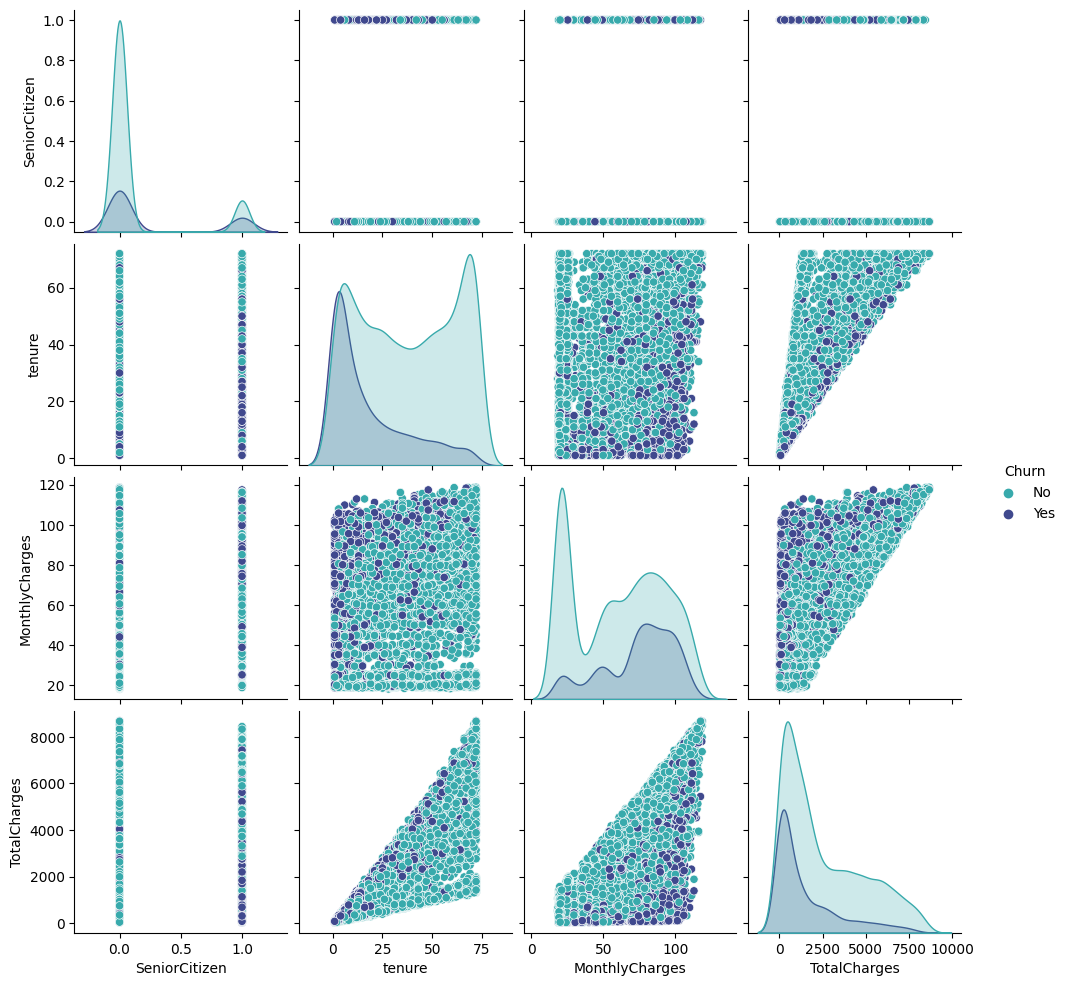

In [ ]:
sns.pairplot(df, diag_kind = 'kde', hue = 'Churn', palette='mako_r')

Yang perlu diperhatikan:
- Apakah ada scatter plot dimana kedua warna terpisah dengan baik? Scatter plot dimana target terpisah dapat menjadi indikasi kombinasi fitur yang baik

**Summary**

Berdasarkan scatterplot diatas, diketahui bahwa customers yang churn cenderung merupakan customers yang tenure-nya singkat dengan monthlycharges yang tinggi atau yang memiliki monthlycharges tinggi dan total charges yang rendah, dapat dilihat bahwa titik Churn_yes berkumpul pada satu titik/area.  Namun, kedua warna titik tidak terlalu terpisah dengan baik, dapat menyebabkan kesimpulan menjadi rancu sehingga perlu dilakukan analisis lebih lanjut.